In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from keras import models
from keras import layers 
#loading cifar10 dataset
(x_train,train_label),(x_test,test_label) =keras.datasets.cifar10.load_data()
'''splitting training data into validation data and training data in such a way that
 first 10000 images and their labels are used for validation purpose and other 40000 
 are used for training purpose'''
#validation data and validation labels
x_validation=x_train[:10000] 
val_label=train_label[:10000]
#training data and training labels
training_data=x_train[10000:]
training_label=train_label[10000:]
#normalizing training data from 0 to 1
training_data=training_data.astype('float32')
training_data=training_data/255
#normalizing validation data from 0 to 1
x_validation=x_validation.astype('float32')
x_validation=x_validation/255
#normalizing testing data from 0 to 1
x_test=x_test.astype('float32')
x_test=x_test/255
#one hot encoding the training, validation and testing labels
classes=10
training_label= keras.utils.to_categorical(training_label,classes)
test_label= keras.utils.to_categorical(test_label,classes)
val_label= keras.utils.to_categorical(val_label,classes)
val_label.shape
training_label[0]
from keras import regularizers
model= models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))
#lr=keras.optimizers.RMSprop(learning_rate=0.01)
def scheduler(epochs, lr=0.1):
  if epochs < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
 
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history=model.fit(training_data,training_label,batch_size=1024,epochs=30,
                  validation_data=(x_validation,val_label),callbacks=[callback])

In [ ]:
#normalizing training data from 0 to 1
training_data=training_data.astype('float32')
training_data=training_data/255
#normalizing validation data from 0 to 1
x_validation=x_validation.astype('float32')
x_validation=x_validation/255
#normalizing testing data from 0 to 1
x_test=x_test.astype('float32')
x_test=x_test/255
#one hot encoding the training, validation and testing labels
classes=10
training_label= keras.utils.to_categorical(training_label,classes)
test_label= keras.utils.to_categorical(test_label,classes)
val_label= keras.utils.to_categorical(val_label,classes)
val_label.shape
training_label[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from keras import regularizers
model= models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10,activation='softmax'))
#lr=keras.optimizers.RMSprop(learning_rate=0.01)
def scheduler(epochs, lr=0.1):
  if epochs < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
 
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_74 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 11, 11, 128)       204928    
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 3200)            

In [ ]:
history=model.fit(training_data,training_label,batch_size=1024,epochs=30,
                  validation_data=(x_validation,val_label),callbacks=[callback])

Epoch 1/30
40/40 [==============================] - 162s 4s/step - loss: 2.3382 - accuracy: 0.1647 - val_loss: 1.8846 - val_accuracy: 0.3401
Epoch 2/30
40/40 [==============================] - 160s 4s/step - loss: 1.9024 - accuracy: 0.3246 - val_loss: 1.8728 - val_accuracy: 0.3091
Epoch 3/30
40/40 [==============================] - 161s 4s/step - loss: 1.8011 - accuracy: 0.3622 - val_loss: 1.7308 - val_accuracy: 0.3524
Epoch 4/30
40/40 [==============================] - 160s 4s/step - loss: 1.5972 - accuracy: 0.4340 - val_loss: 1.4319 - val_accuracy: 0.4833
Epoch 5/30
40/40 [==============================] - 160s 4s/step - loss: 1.5407 - accuracy: 0.4691 - val_loss: 1.4961 - val_accuracy: 0.4772
Epoch 6/30
40/40 [==============================] - 160s 4s/step - loss: 1.4185 - accuracy: 0.5073 - val_loss: 1.4672 - val_accuracy: 0.4673
Epoch 7/30
40/40 [==============================] - 161s 4s/step - loss: 1.3400 - accuracy: 0.5351 - val_loss: 1.4173 - val_accuracy: 0.4870
Epoch 8/30
40

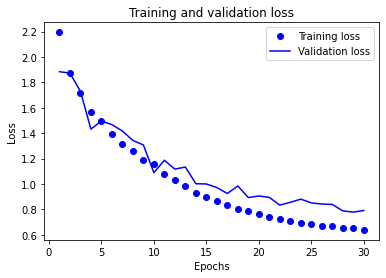

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

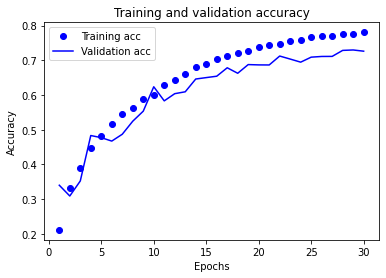

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results=model.evaluate(x_test, test_label, verbose=0)
results

[0.8130086660385132, 0.7231000065803528]